# Regression Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from urllib import urlretrieve

In [2]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, 'data/es.txt')
urlretrieve(vs_url, 'data/vs.txt')
!ls -o data/

total 3104
-rw-r--r--  1 jmp  688500 Feb 25 00:13 es.txt
-rw-r--r--  1 jmp  531406 Feb 24 23:51 es50.txt
-rw-r--r--  1 jmp  363485 Feb 25 00:13 vs.txt


In [3]:
lines = open('data/es.txt', 'r').readlines()
lines = [ line.replace(' ', '') for line in lines ]
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [4]:
for line in lines[3883:3890]:
             print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [5]:
new_file = open('./data/es50.txt', 'w')
# opens a new file
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
# writes the corrected third line of the original file
# as first line of new file
new_file.writelines(lines[4:])
# writes the remaining lines of the orignial file
new_file.close()

In [6]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [7]:
es = pd.read_csv('data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)
np.round(es.tail())
del es['DEL']
es.head()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
date,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06


In [8]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [9]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
                 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';', dayfirst=True, header=None, skiprows=4, names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [10]:
vs = pd.read_csv(vs_url, index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [11]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX': es['SX5E'][(es.index > dt.datetime(1999, 1, 1)) & (es.index < dt.datetime(2015, 12, 31))]})
data = data.join(pd.DataFrame({'VSTOXX': vs['V2TX'][(vs.index > dt.datetime(1999, 1, 1)) & (vs.index < dt.datetime(2015, 12, 31))]}))
data.tail(25)

,EUROSTOXX,VSTOXX
2015-11-25,3462.06,23.9372
2015-11-26,3498.62,22.8903
2015-11-27,3488.99,23.0669
2015-11-30,3506.45,23.6503
2015-12-01,3479.64,23.6051
2015-12-02,3468.66,22.8176
2015-12-03,3343.34,22.6526
2015-12-04,3330.75,22.6816
2015-12-07,3360.21,22.0447
2015-12-08,3297.46,23.5733


In [12]:
data = data.fillna(method='ffill')
data.info()
print data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4356 entries, 1999-01-04 to 2015-12-30
Data columns (total 2 columns):
EUROSTOXX    4356 non-null float64
VSTOXX       4356 non-null float64
dtypes: float64(2)
memory usage: 102.1 KB
            EUROSTOXX   VSTOXX
1999-01-04    3543.10  18.2033
1999-01-05    3604.67  29.6912
1999-01-06    3685.36  25.1670
1999-01-07    3627.87  32.5205
1999-01-08    3616.57  33.2296
1999-01-11    3546.40  36.8411
1999-01-12    3502.38  37.5664
1999-01-13    3336.45  39.7373
1999-01-14    3365.43  39.1373
1999-01-15    3426.06  38.6741
1999-01-18    3515.43  38.5439
1999-01-19    3515.69  38.7869
1999-01-20    3601.36  35.5535
1999-01-21    3561.56  36.9171
1999-01-22    3426.11  39.9439
1999-01-25    3428.80  40.7034
1999-01-26    3433.87  42.7544
1999-01-27    3453.70  41.7569
1999-01-28    3511.31  39.1479
1999-01-29    3547.15  37.6140
1999-02-01    3597.04  37.0314
1999-02-02    3541.43  38.6119
1999-02-03    3488.13  39.9634
1999-02-04    3487.0

In [13]:
data.tail()

,EUROSTOXX,VSTOXX
2015-12-23,3286.68,20.2504
2015-12-24,3284.47,20.2504
2015-12-28,3256.49,22.4544
2015-12-29,3314.28,21.6067
2015-12-30,3287.98,22.1745


array([<matplotlib.axes.AxesSubplot object at 0x111a04510>,
       <matplotlib.axes.AxesSubplot object at 0x1113911d0>], dtype=object)

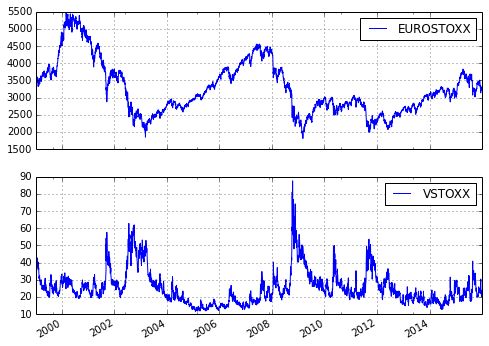

In [14]:
data.plot(subplots=True, figsize=(8, 6), grid=True, style='b')

In [15]:
rets = np.log(data / data.shift(1))
rets = rets.fillna(method='bfill')
rets.tail()

,EUROSTOXX,VSTOXX
2015-12-23,0.022262,-0.106944
2015-12-24,-0.000673,0.000000
2015-12-28,-0.008555,0.103312
2015-12-29,0.017590,-0.038483
2015-12-30,-0.007967,0.025940


array([<matplotlib.axes.AxesSubplot object at 0x1114b4b10>,
       <matplotlib.axes.AxesSubplot object at 0x112039490>], dtype=object)

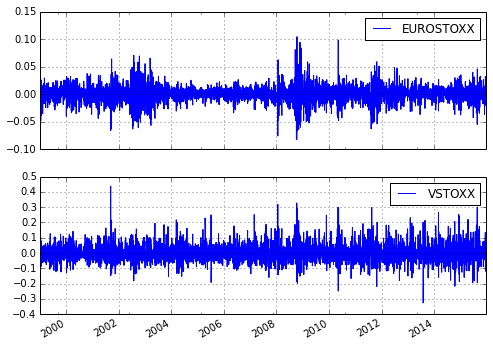

In [16]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [17]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
import statsmodels.api as sm 
model = sm.OLS(ydat, xdat).fit()
predictions = model.predict(xdat)

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VSTOXX   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     4871.
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        00:13:40   Log-Likelihood:                 7818.8
No. Observations:                4356   AIC:                        -1.564e+04
Df Residuals:                    4355   BIC:                        -1.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EUROSTOXX     -2.8265      0.040    -69.790      0.000      -2.906      -2.747
==============================================================================
Omnibus:                     1879.876   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58167.492
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                      20.671   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
print('Parameters: ', model.params)
print('Standard errors: ', model.bse)
print('Predicted values: ', predictions.tail(20))

('Parameters: ', EUROSTOXX   -2.826475
dtype: float64)
('Standard errors: ', EUROSTOXX    0.0405
dtype: float64)
('Predicted values: ', 2015-12-02    0.008933
2015-12-03    0.104009
2015-12-04    0.010664
2015-12-07   -0.024890
2015-12-08    0.053282
2015-12-09    0.017411
2015-12-10    0.006251
2015-12-11    0.058303
2015-12-14    0.057018
2015-12-15   -0.090613
2015-12-16   -0.004592
2015-12-17   -0.051491
2015-12-18    0.039382
2015-12-21    0.041662
2015-12-22   -0.001152
2015-12-23   -0.062923
2015-12-24    0.001901
2015-12-28    0.024182
2015-12-29   -0.049719
2015-12-30    0.022519
dtype: float64)


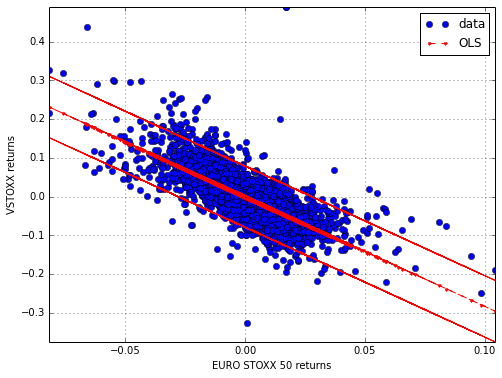

In [20]:
# http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(model)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(xdat, ydat, 'o', label="data")
ax.plot(xdat, model.fittedvalues, 'r--.', label="OLS")
ax.plot(xdat, iv_u, 'r-')
ax.plot(xdat, iv_l, 'r-')
ax.set_xlabel('EURO STOXX 50 returns')
ax.set_ylabel('VSTOXX returns')
ax.grid(True)
ax.autoscale(tight=True)
ax.legend(loc='best');

In [21]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.0000,-0.7266
VSTOXX,-0.7266,1.0000


/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


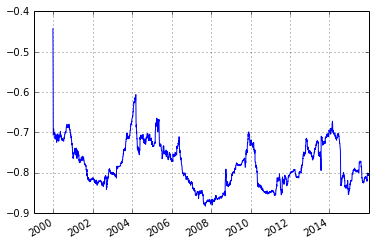

In [22]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'], window=252).plot(grid=True, style='b')

*Note: Grew tired of working around bugs in the book, start at `High-Frequency Data` section...*  Looks like the real value of that section is learning to use the resample commands